# EDA

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


# se hizo una elección de los datasets que iba a usar y ya empiezo a trabajar con ellos en este archivo

In [218]:
internet_tecnología_provincia= pd.read_csv("dataset_etl/tecnologia_penetracion_merged.csv")

In [219]:
internet_tecnología_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año_x                         2881 non-null   object 
 1   Trimestre_x                   2881 non-null   object 
 2   Provincia_x                   2880 non-null   object 
 3   ADSL                          2880 non-null   object 
 4   Cablemodem                    2880 non-null   object 
 5   Fibra óptica                  2880 non-null   object 
 6   Wireless                      2880 non-null   object 
 7   Otros                         2880 non-null   float64
 8   Total                         2880 non-null   object 
 9   Item                          2881 non-null   object 
 10  Año_y                         2808 non-null   float64
 11  Trimestre_y                   2808 non-null   float64
 12  Provincia_y                   2808 non-null   object 
 13  Acc

## 1. Porcentaje de comportamiento de tecnología a lo largo del tiempo

### Necesito cambiar algunos tipos de dato

In [220]:
internet_tecnología_provincia['ADSL'] = internet_tecnología_provincia['ADSL'].str.replace('[\.\- ]', '', regex=True).astype(float)

In [221]:
internet_tecnología_provincia['Fibra óptica'] = internet_tecnología_provincia['Fibra óptica'].str.replace('[\.\- ]', '', regex=True).astype(float)


In [222]:
internet_tecnología_provincia['Wireless'] = internet_tecnología_provincia['Wireless'].str.replace('[\.\- ]', '', regex=True).astype(float)
internet_tecnología_provincia['Total'] = internet_tecnología_provincia['Total'].str.replace('[\.\- ]', '', regex=True).astype(float)

In [223]:
internet_tecnología_provincia['Cablemodem'] = internet_tecnología_provincia['Cablemodem'].str.replace('[\.\- ]', '', regex=True).astype(float)

### creo columnas con el porcentaje de usos de tecnología 

In [224]:
internet_tecnología_provincia['adsl_%'] = (internet_tecnología_provincia['ADSL'] / internet_tecnología_provincia['Total']) * 100
internet_tecnología_provincia['cablemodem_%'] = (internet_tecnología_provincia['Cablemodem'] / internet_tecnología_provincia['Total']) * 100
internet_tecnología_provincia['fibra_%'] = (internet_tecnología_provincia['Fibra óptica'] / internet_tecnología_provincia['Total']) * 100
internet_tecnología_provincia['wireless_%'] = (internet_tecnología_provincia['Wireless'] / internet_tecnología_provincia['Total']) * 100
internet_tecnología_provincia['otros_%'] = (internet_tecnología_provincia['Otros'] / internet_tecnología_provincia['Total']) * 100

### columna con la tecnología más usada por provincia

In [225]:

internet_tecnología_provincia['Tecnologia_Mas_Utilizada'] = internet_tecnología_provincia[['adsl_%', 'cablemodem_%', 'fibra_%', 'wireless_%', 'otros_%']].idxmax(axis=1)

### calculemos el porcentaje promedio de cada tecnología

In [226]:
tecnologias = ['adsl_%', 'cablemodem_%', 'fibra_%', 'wireless_%', 'otros_%']
df_tecnologias = internet_tecnología_provincia[['Provincia_x'] + tecnologias]
df_promedio_tecnologias = df_tecnologias.groupby('Provincia_x').mean()

In [227]:
#saquemos un top 5 de los mayores porcentajes
top5_provincias = {}
for tecnologia in tecnologias:
    top5_provincias[tecnologia] = df_promedio_tecnologias.nlargest(5, tecnologia).index.tolist()

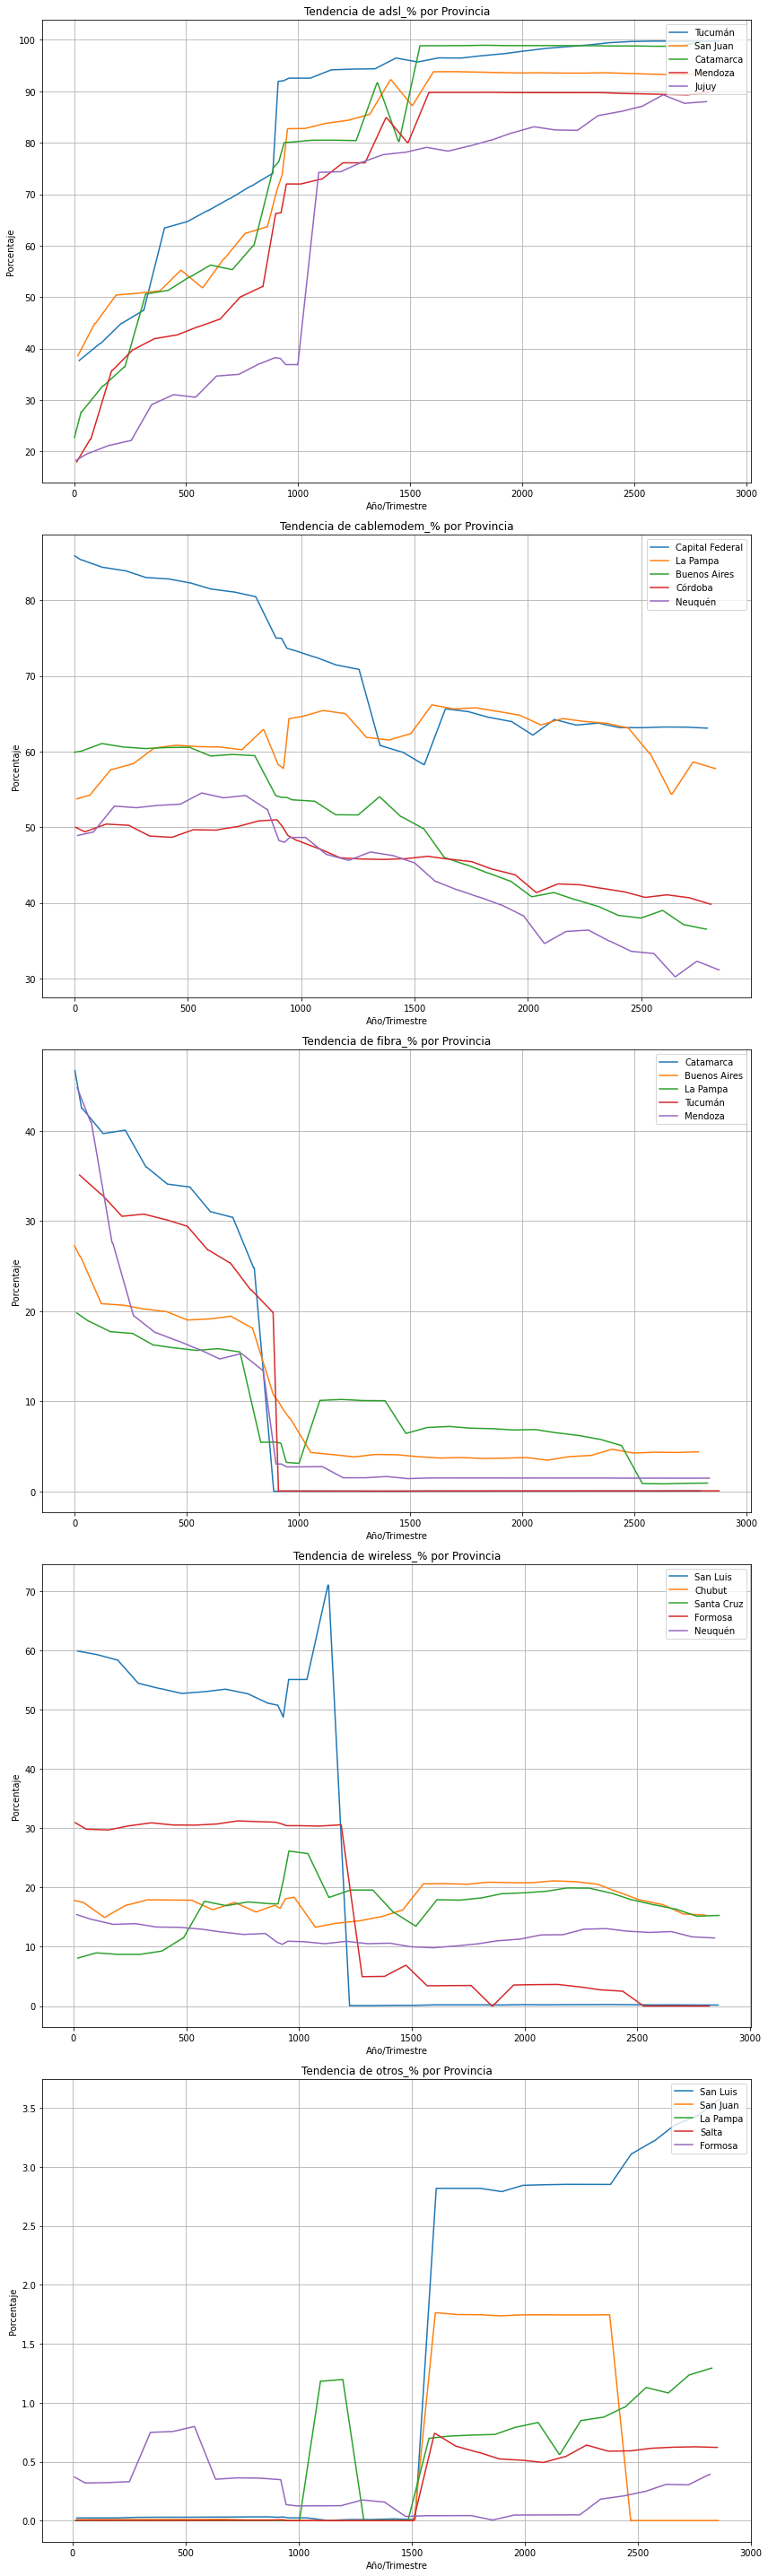

In [228]:
#CREO UN GRÁFICO DE LINEAS,  AQUI MOSTRAMOS LAS 5 PROVINCIAS CON MAS PORCENTAJE EN CADA TECNOLOGÍA Y SU COMPORTAMIENTO
# A LO LARGO DEL TIEMPO

fig, axs = plt.subplots(len(tecnologias), figsize=(12, 8 * len(tecnologias)))

for i, tecnologia in enumerate(tecnologias):
    ax = axs[i]
    for provincia in top5_provincias[tecnologia]:
        provincia_data = df_tecnologias[df_tecnologias['Provincia_x'] == provincia]
        ax.plot(provincia_data.index, provincia_data[tecnologia], label=provincia)
        
    ax.set_title(f'Tendencia de {tecnologia} por Provincia')
    ax.set_xlabel('Año/Trimestre')
    ax.set_ylabel('Porcentaje')
    ax.legend(loc='upper right')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [229]:
internet_tecnología_provincia.columns

Index(['Año_x', 'Trimestre_x', 'Provincia_x', 'ADSL', 'Cablemodem',
       'Fibra óptica', 'Wireless', 'Otros', 'Total', 'Item', 'Año_y',
       'Trimestre_y', 'Provincia_y', 'Accesos por cada 100 hogares', 'adsl_%',
       'cablemodem_%', 'fibra_%', 'wireless_%', 'otros_%',
       'Tecnologia_Mas_Utilizada'],
      dtype='object')

## 2. Tendencia de acceso

In [230]:
# escojo columnas relevantes
tendencia_acceso = internet_tecnología_provincia[['Año_x', 'Trimestre_x', 'Accesos por cada 100 hogares', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]


In [231]:
# agrupo por año y trimestre
tendencia_acceso = tendencia_acceso.groupby(['Año_x', 'Trimestre_x']).mean().reset_index()

C:\Users\SEBASTIAN\AppData\Local\Temp\ipykernel_11260\2029913020.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tendencia_acceso = tendencia_acceso.groupby(['Año_x', 'Trimestre_x']).mean().reset_index()


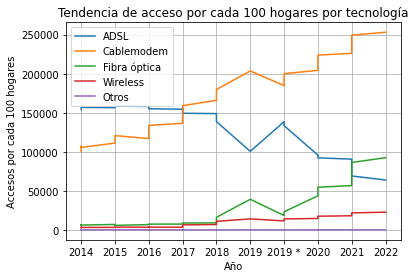

In [232]:
# graficamos la tendencia de acceso por cada 100 hogares

import matplotlib.pyplot as plt

tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

for tecnologia in tecnologias:
    plt.plot(tendencia_acceso['Año_x'], tendencia_acceso[tecnologia], label=tecnologia)

plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Tendencia de acceso por cada 100 hogares por tecnología')
plt.legend()
plt.grid(True)
plt.show()

### 3. Porción de hogares con acceso a internet a lo largo del tiempo

In [233]:
# necesito arreglar los números que poseen espacios o caracteres no numéricos para poder cambiarlos de tipo
internet_tecnología_provincia['Accesos por cada 100 hogares'] = internet_tecnología_provincia['Accesos por cada 100 hogares'].str.replace(r'\D', '', regex=True)

In [234]:
# cambio de tipo
internet_tecnología_provincia['Accesos por cada 100 hogares'] = pd.to_numeric(internet_tecnología_provincia['Accesos por cada 100 hogares'], errors='coerce')

In [235]:
# escojo columnas relevantes
df_tendencia = internet_tecnología_provincia[['Año_x', 'Trimestre_x', 'Accesos por cada 100 hogares']]

In [236]:
#agrupamos por año y trimestre
df_tendencia = df_tendencia.groupby(['Año_x', 'Trimestre_x']).mean().reset_index()

In [237]:
# calculamos la suma acumulada por cada 100 hogares
df_tendencia['Accesos acumulados'] = df_tendencia['Accesos por cada 100 hogares'].cumsum()

In [239]:
df_tendencia['Año_x'].unique()

array(['*', '2014', '2015', '2016', '2017', '2018', '2019', '2019 *',
       '2020', '2021', '2022'], dtype=object)

In [240]:
df_tendencia['Año_x'] = df_tendencia['Año_x'].str.replace('\D', '', regex=True)

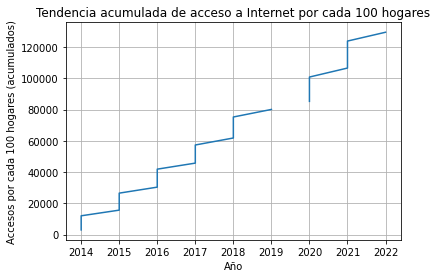

In [241]:
#visualizamos la tendencia acumulada a lo largo de los años
plt.plot(df_tendencia['Año_x'], df_tendencia['Accesos acumulados'])
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares (acumulados)')
plt.title('Tendencia acumulada de acceso a Internet por cada 100 hogares')
plt.grid(True)
plt.show()

## 4. Eficacia del servicio

In [242]:
reclamos= pd.read_csv("reclamos/Denuncias_y_reclamos_202306.csv")

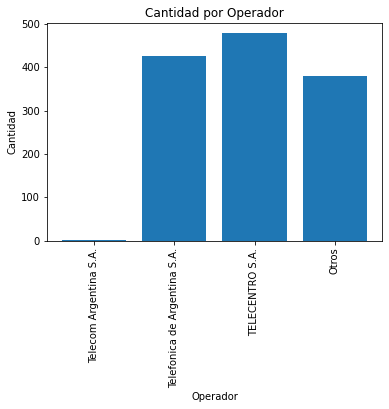

In [243]:
plt.bar(reclamos['Operador'], reclamos['Cantidad'])
plt.xlabel('Operador')
plt.ylabel('Cantidad')
plt.title('Cantidad por Operador')
plt.xticks(rotation=90)  # Girar las etiquetas del eje x para mayor legibilidad si es necesario
plt.show()

In [ ]:
# aquí esta gráfica me muestra que telecom argentina casi no tiene reclamos, y telecentro es el que más quejas tiene.

In [244]:
#necesito saber la cantidad de reclamos por motivo en cada opoerador

reclamos_motivo= pd.read_csv("reclamos/Denuncias_y_reclamos_motivo_202306.csv")

In [247]:
reclamos_motivo

,Año,Mes,Motivo de Reclamo,Operador,Cantidad
0,2023,1,Facturación,AMX Argentina S.A. (Claro),16
1,2023,1,Facturación,DIRECTV Argentina S.A.L,4
2,2023,1,Facturación,Fibertel S.A. (TCI),8
3,2023,1,Facturación,Movistar - Telefonica Moviles Argentina S.A.,24
4,2023,1,Facturación,Otros,25
...,...,...,...,...,...
179,2023,5,Problemas Técnicos,Movistar - Telefonica Moviles Argentina S.A.,18
180,2023,5,Problemas Técnicos,Otros,30
181,2023,5,Problemas Técnicos,TELECENTRO S.A.,26
182,2023,5,Problemas Técnicos,Telecom Argentina S.A.,516


In [245]:
#agrupo los datos por operador, motivo y año
operador_motivo_año = reclamos_motivo.groupby(['Operador', 'Motivo de Reclamo', 'Año']).sum().reset_index()

In [248]:
operador_motivo_año.head()

,Operador,Motivo de Reclamo,Año,Mes,Cantidad
0,AMX Argentina S.A. (Claro),Facturación,2023,15,109
1,AMX Argentina S.A. (Claro),Gestiones Administrativas,2023,15,99
2,AMX Argentina S.A. (Claro),Otros,2023,15,55
3,AMX Argentina S.A. (Claro),Problemas Técnicos,2023,15,83
4,DIRECTV Argentina S.A.L,Facturación,2023,15,34


In [253]:
df_operador_motivo = operador_motivo_año.groupby(['Operador', 'Motivo de Reclamo'])['Cantidad'].sum().reset_index()

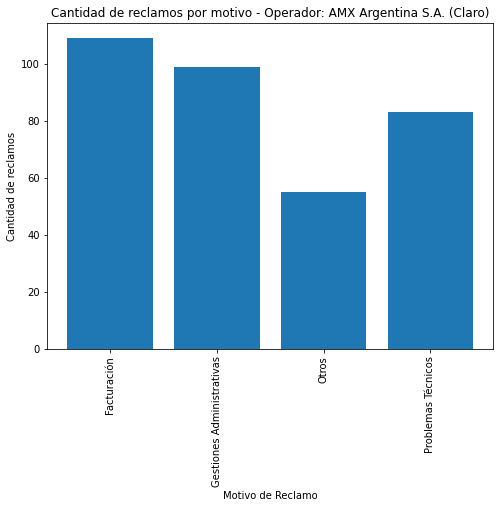

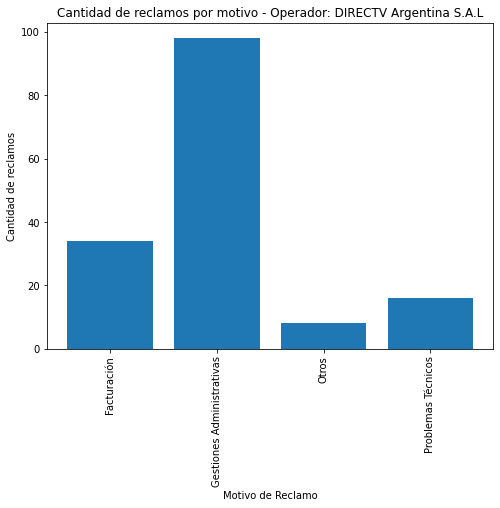

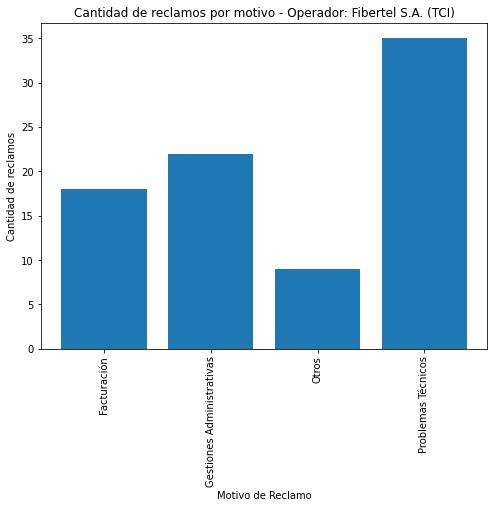

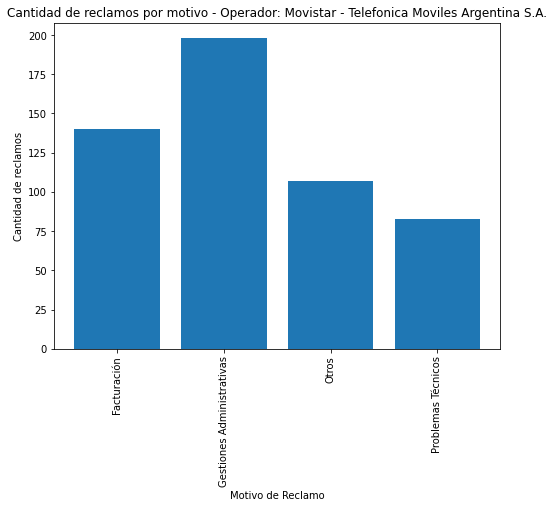

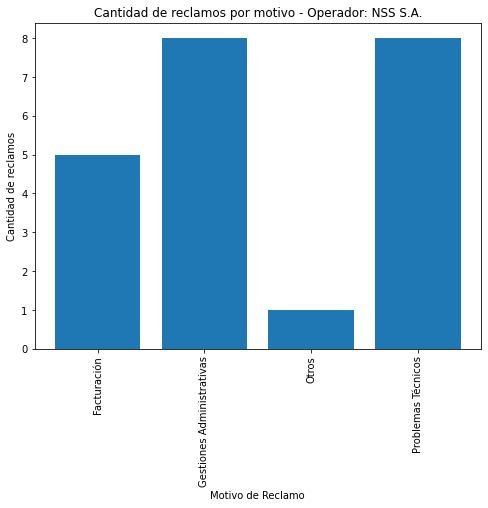

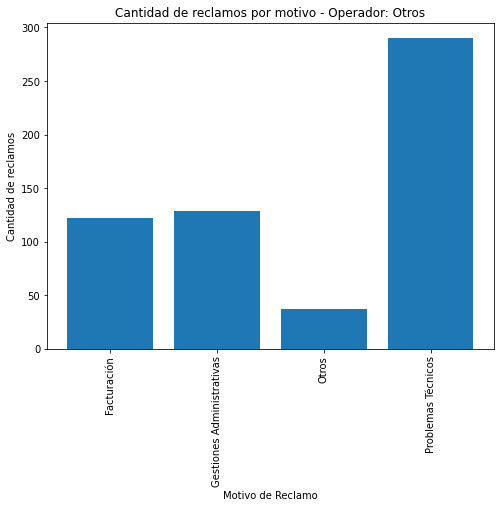

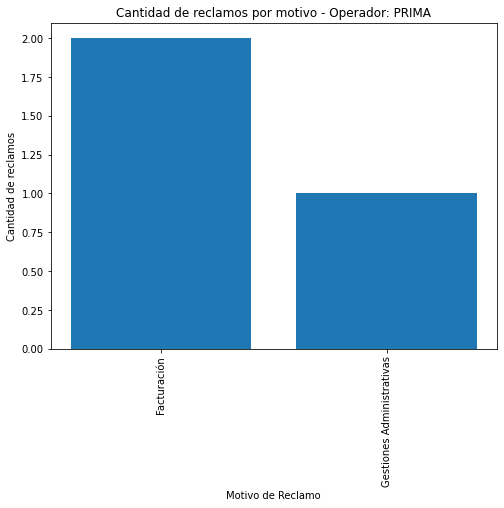

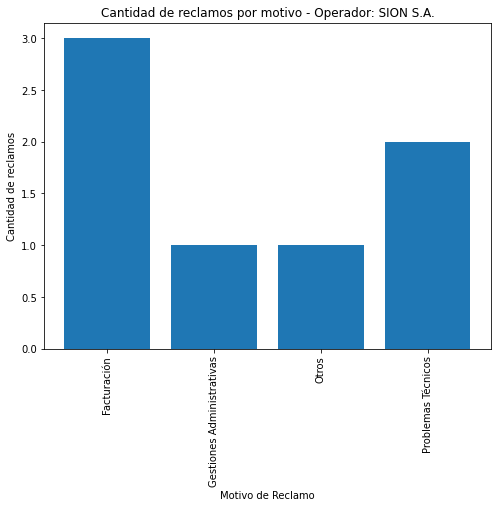

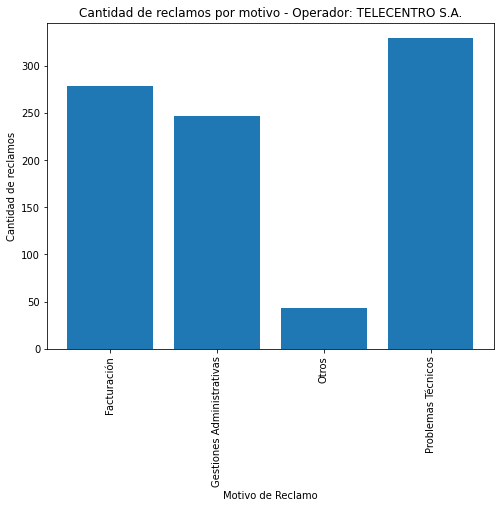

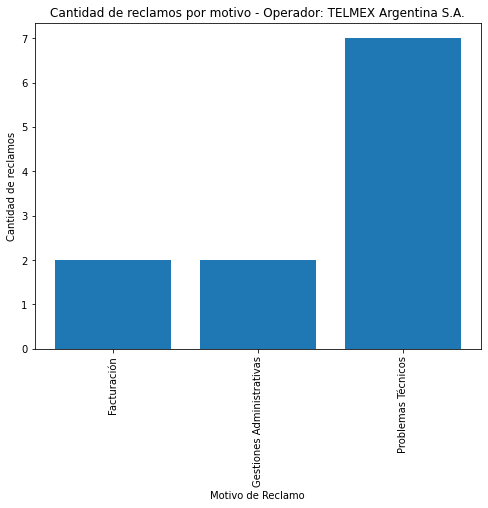

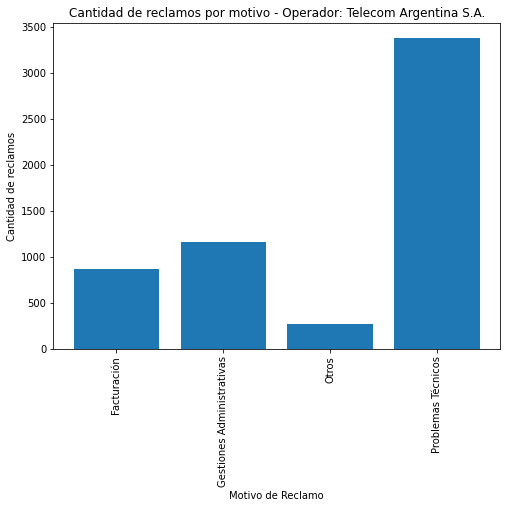

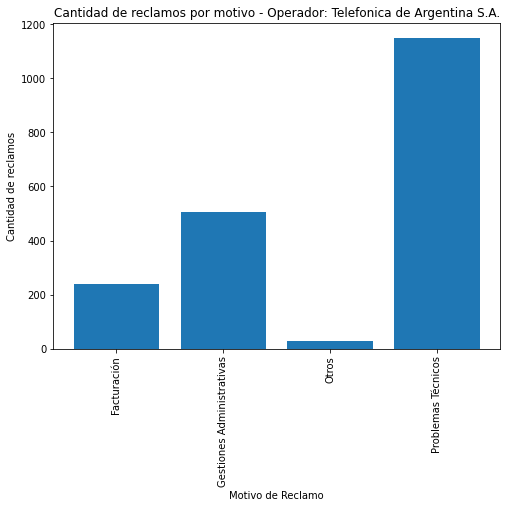

In [254]:
operadores = operador_motivo_año['Operador'].unique()

for operador in operadores:
    df_filtrado = df_operador_motivo[df_operador_motivo['Operador'] == operador]
    
    plt.figure(figsize=(8, 6))
    plt.bar(df_filtrado['Motivo de Reclamo'], df_filtrado['Cantidad'])
    plt.xlabel('Motivo de Reclamo')
    plt.ylabel('Cantidad de reclamos')
    plt.title(f'Cantidad de reclamos por motivo - Operador: {operador}')
    plt.xticks(rotation=90)
    plt.show()


## Queja más frecuente de año

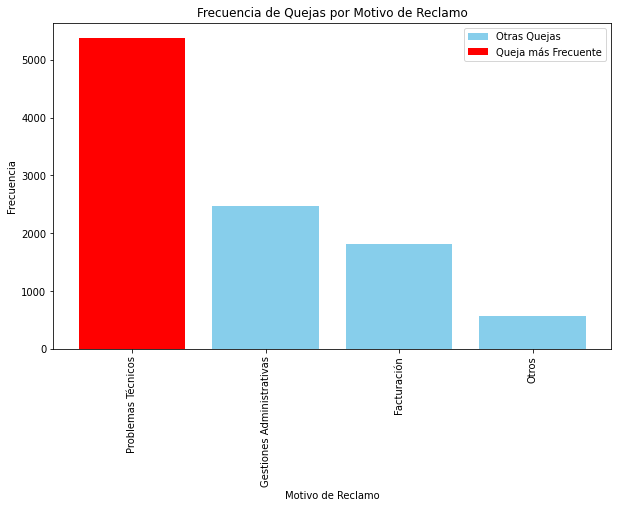

In [272]:
# Agrupo los datos por 'Motivo de Reclamo' y calcular la suma de 'Cantidad'
df_frecuencial = operador_motivo_año.groupby('Motivo de Reclamo')['Cantidad'].sum().reset_index(name='Frecuencia')

# se ordenan las quejas por frecuencia de mayor a menor
df_frecuencia_ordenado = df_frecuencial.sort_values(by='Frecuencia', ascending=False)

# Obtener la queja más frecuente
queja_mas_frecuente = df_frecuencia_ordenado.iloc[0]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_frecuencia_ordenado['Motivo de Reclamo'], df_frecuencia_ordenado['Frecuencia'], color='skyblue')
plt.bar(queja_mas_frecuente['Motivo de Reclamo'], queja_mas_frecuente['Frecuencia'], color='red')
plt.xlabel('Motivo de Reclamo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Quejas por Motivo de Reclamo')
plt.legend(['Otras Quejas', 'Queja más Frecuente'])
plt.xticks(rotation=90)
plt.show()

### tasa de crecimientos en ventas

In [273]:
df_ingresos = pd.read_csv('dataset_etl/Ingresos.csv')

In [274]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,1,51432896.0,Ene-Mar 2022
1,2021,4,45467887.0,Oct-Dic 2021
2,2021,3,42999944.0,Jul-Sept 2021
3,2021,2,38239667.0,Abr-Jun 2021
4,2021,1,36676371.0,Ene-Mar 2021


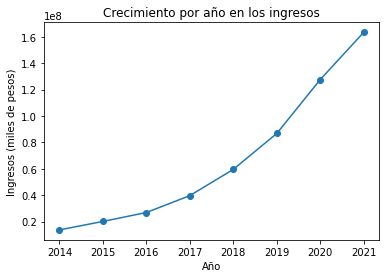

In [277]:

# vemos el comportamiento hasta 2021
ingresos_por_año = df_ingresos[df_ingresos['Año'] != 2022].groupby('Año')['Ingresos (miles de pesos)'].sum()

# Crear una figura y un eje
fig, ax = plt.subplots()

# crecimiento por año en los ingresos
ax.plot(ingresos_por_año.index, ingresos_por_año.values, marker='o')


ax.set_xlabel('Año')
ax.set_ylabel('Ingresos (miles de pesos)')
ax.set_title('Crecimiento por año en los ingresos')


plt.show()
